Black-Scholes Model

https://www.investopedia.com/terms/b/blackscholes.asp

Black-Scholes posits that instruments, such as stock shares or futures contracts, will have a lognormal distribution of prices following a random walk with constant drift and volatility. Using this assumption and factoring in other important variables, the equation derives the price of a European-style call option.

6 Variables: volatility, the price of the underlying asset, the strike price of the option, the time until the expiration of the option, the risk-free interest rate, and the type of option (call or put).

image.png

These dynamics are often referred to as Geometric Brownian motion, and it can
be shown that specifying this model is equivalent to assuming that prices are log-normally distributed, and that returns are subsequently normally distributed. The model is characterized by a single parameter, σ which defines the volatility of the asset

Assumptions: No dividends are paid out during the life of the option.
Markets are random (i.e., market movements cannot be predicted).
There are no transaction costs in buying the option.
The risk-free rate and volatility of the underlying asset are known and constant.
The returns of the underlying asset are normally distributed.
The option is European and can only be exercised at expiration.

Assume asset prices are log-normally distributed.

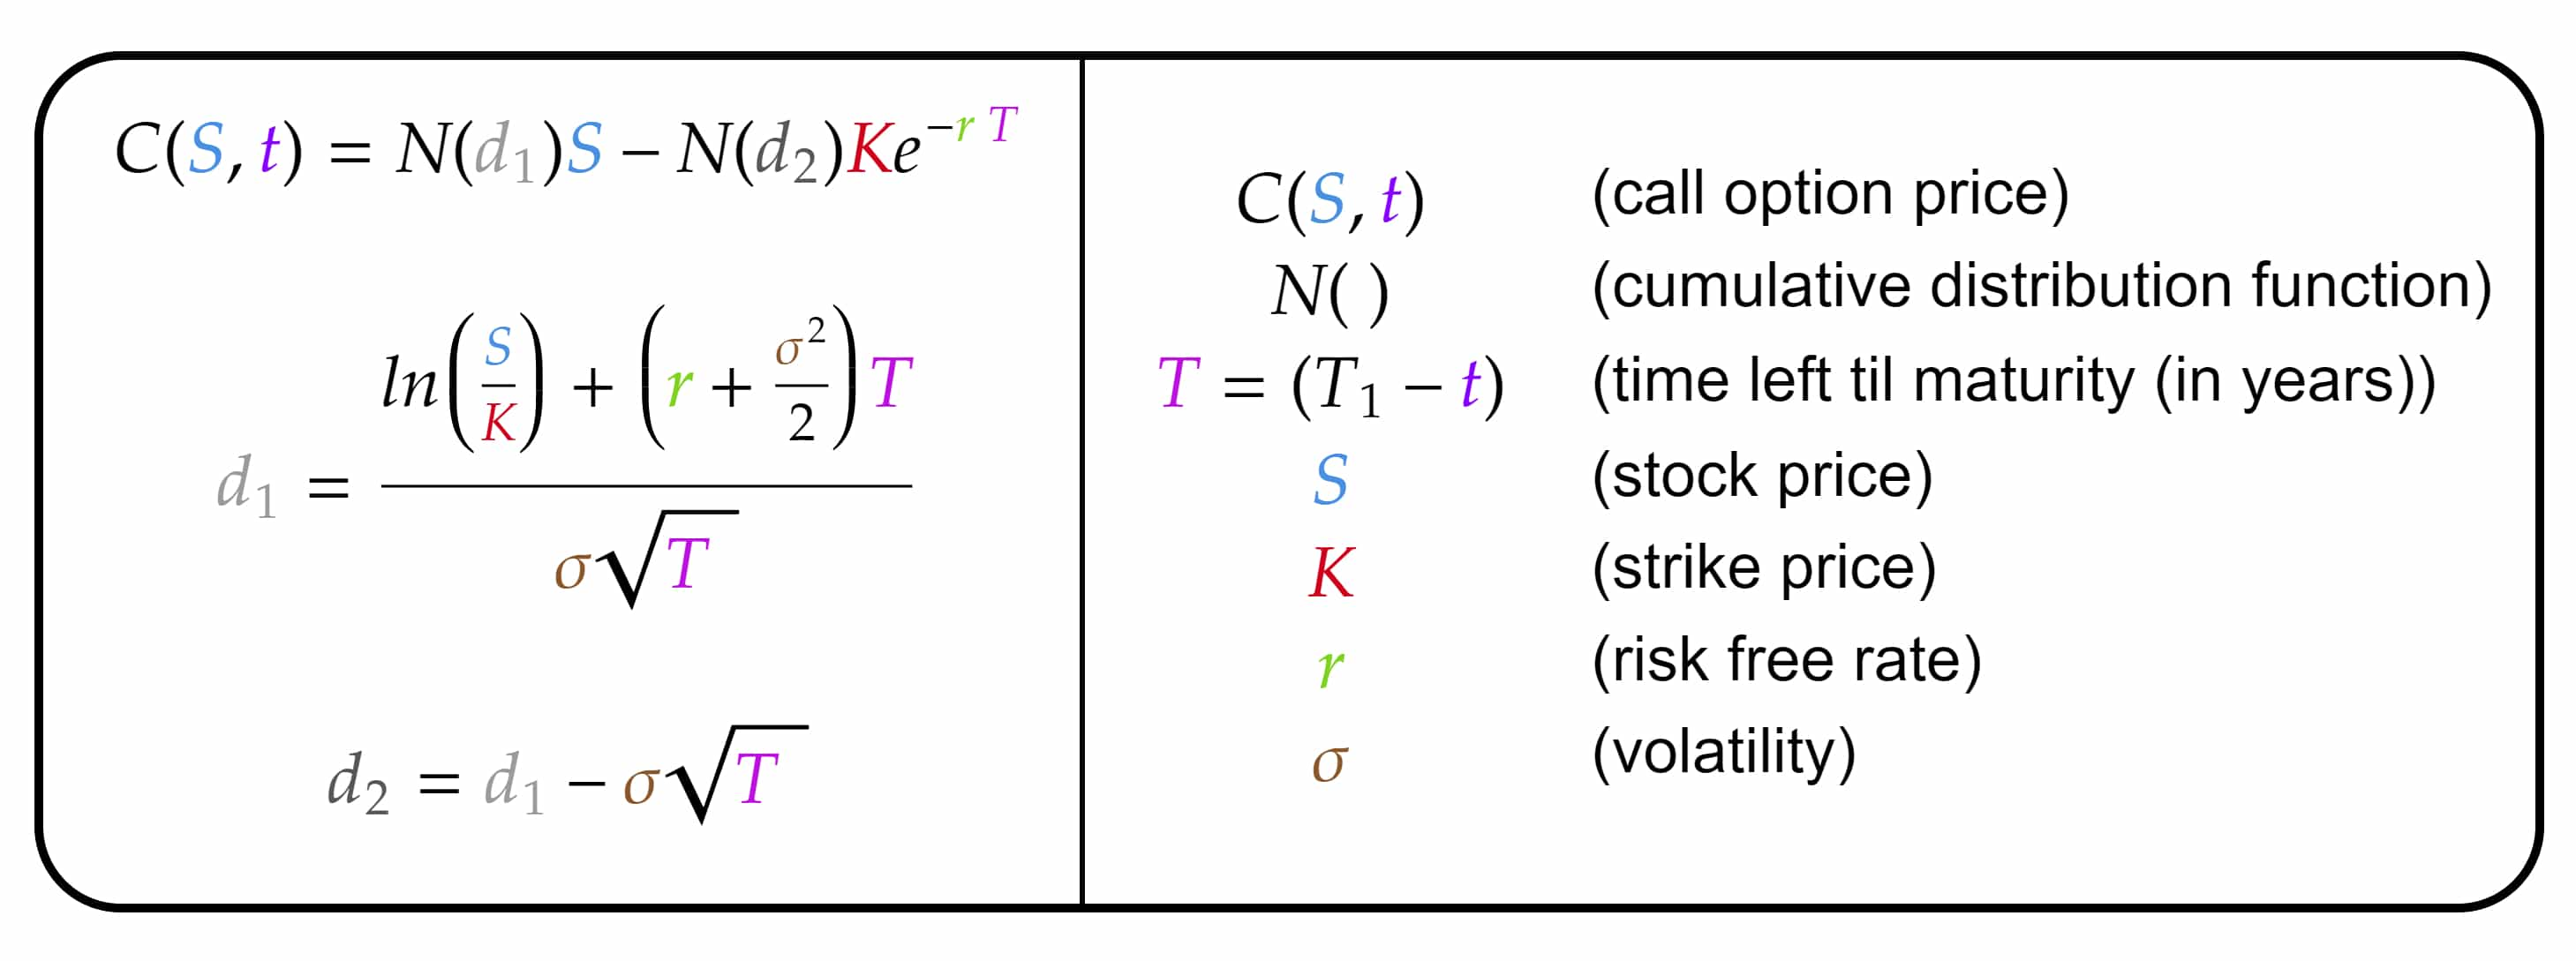

In [1]:
# ChatGPT
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European call option.

    Parameters:
    S : float : Spot price of the underlying asset
    K : float : Strike price of the option
    T : float : Time to expiration in years
    r : float : Risk-free interest rate
    sigma : float : Volatility of the underlying asset

    Returns:
    float : Call option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European put option.

    Parameters:
    S : float : Spot price of the underlying asset
    K : float : Strike price of the option
    T : float : Time to expiration in years
    r : float : Risk-free interest rate
    sigma : float : Volatility of the underlying asset

    Returns:
    float : Put option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price


In [2]:
S = 100     # Spot price of the underlying asset
K = 100     # Strike price
T = 1       # Time to expiration in years
r = 0.05    # Risk-free interest rate
sigma = 0.2 # Volatility

call_price = black_scholes_call(S, K, T, r, sigma)
put_price = black_scholes_put(S, K, T, r, sigma)

print(f"Call Option Price: {call_price}")
print(f"Put Option Price: {put_price}")

Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971


In [13]:
# https://theaiquant.medium.com/mastering-the-black-scholes-model-with-python-a-comprehensive-guide-to-option-pricing-11af712697b7

import yfinance as yf  #download options data for major financial institutions such as JPMorgan Chase & Co. (JPM), Goldman Sachs Group Inc. (GS), Morgan Stanley (MS), BlackRock Inc. (BLK) and Citigroup Inc. (C).
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
from datetime import datetime

def fetch_options_data(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    options_dates = ticker.options
    # We'll use the nearest expiry date for our analysis
    options_data = ticker.option_chain(options_dates[0])
    return options_data.calls, options_data.puts

# Example usage:
jpm_calls, jpm_puts = fetch_options_data('JPM')

#visualize
jpm_stock_data = yf.download("JPM", start="2023-01-01", end="2023-12-31")  # obtaining historical data for any stock.
jpm_stock_data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,135.240005,136.740005,133.889999,135.119995,129.648483,11054800
2023-01-04,135.990005,137.679993,135.570007,136.380005,130.857498,11687600
2023-01-05,135.660004,135.710007,133.699997,135.350006,130.828491,8381300
2023-01-06,136.130005,138.380005,134.490005,137.940002,133.331970,10029100
2023-01-09,138.600006,138.880005,136.880005,137.369995,132.781006,8482300
...,...,...,...,...,...,...
2023-12-22,167.500000,168.229996,167.229996,167.399994,165.409210,6574900
2023-12-26,167.460007,168.770004,167.179993,168.389999,166.387451,4683600
2023-12-27,167.839996,169.470001,167.580002,169.399994,167.385437,6428600


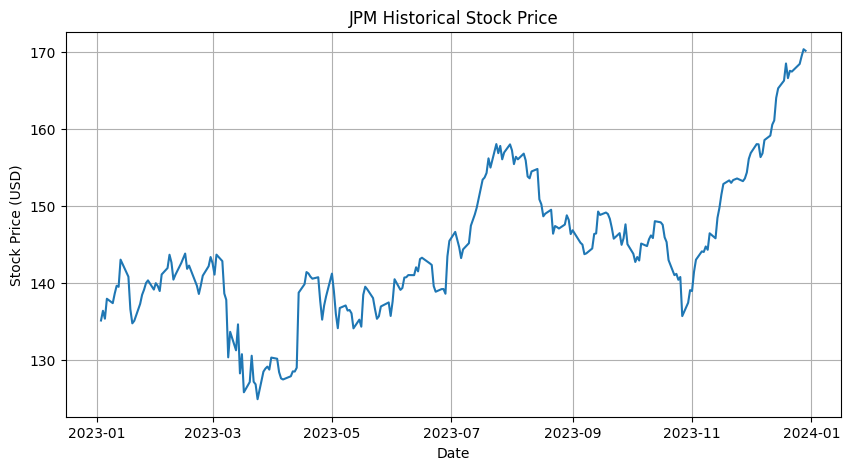

In [14]:
# visualize the historical stock price data for JPM
plt.figure(figsize=(10, 5))
plt.plot(jpm_stock_data['Close'])
plt.title('JPM Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)

In [15]:
# Implementing the Black-Scholes Model
# The Black-Scholes model is a mathematical model that provides a theoretical estimate for the price of European-style options.
class BlackScholesModel:
    def __init__(self, S, K, T, r, sigma):
        self.S = S        # Underlying asset price
        self.K = K        # Option strike price
        self.T = T        # Time to expiration in years
        self.r = r        # Risk-free interest rate
        self.sigma = sigma  # Volatility of the underlying asset

    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))

    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)

    def call_option_price(self):
        return (self.S * si.norm.cdf(self.d1(), 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0))

    def put_option_price(self):
        return (self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0) - self.S * si.norm.cdf(-self.d1(), 0.0, 1.0))

# Example usage:
bsm = BlackScholesModel(S=100, K=100, T=1, r=0.05, sigma=0.2)

print(f"Call Option Price: {bsm.call_option_price()}")
print(f"Put Option Price: {bsm.put_option_price()}")

Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971


With our Black-Scholes model implemented, we can now price options for our selected stocks. However, to do so accurately, we need to estimate the volatility (sigma) of the underlying asset. Volatility is a measure of the asset's price fluctuations over time and is typically calculated as the annualized standard deviation of the asset's returns.

In [16]:
def calculate_historical_volatility(stock_data, window=252):
    log_returns = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
    volatility = np.sqrt(window) * log_returns.std()
    return volatility

jpm_volatility = calculate_historical_volatility(jpm_stock_data)
print(f"JPM Historical Volatility: {jpm_volatility}")

JPM Historical Volatility: 0.2082442997171826


Greeks - measure the sensitivity of the option price to various factors


Delta: Measures the rate of change of the option price with respect to changes in the underlying asset's price. For call options, delta values range from 0 to 1, while for put options, the range is from -1 to 0.

Gamma: Measures the rate of change in delta with respect to changes in the underlying asset's price. Gamma is particularly important as it affects how delta changes as the underlying price moves.

Theta: Measures the rate of decline in the option's value with respect to the passing of time (time decay). Theta is typically negative, indicating a loss in value as time passes.

Vega: Measures the sensitivity of the option price to volatility in the underlying asset's price. Vega indicates how much the option price will change given a 1% change in the asset's volatility.

Rho: Measures the sensitivity of the option price to changes in the risk-free interest rate. For call options, a higher rate typically increases the option value, and vice versa for put options.

In [17]:
class BlackScholesGreeks(BlackScholesModel):
    def delta_call(self):
        return si.norm.cdf(self.d1(), 0.0, 1.0)

    def delta_put(self):
        return -si.norm.cdf(-self.d1(), 0.0, 1.0)

    def gamma(self):
        return si.norm.pdf(self.d1(), 0.0, 1.0) / (self.S * self.sigma * np.sqrt(self.T))

    def theta_call(self):
        return (-self.S * si.norm.pdf(self.d1(), 0.0, 1.0) * self.sigma / (2 * np.sqrt(self.T)) - self.r * self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0))

    def theta_put(self):
        return (-self.S * si.norm.pdf(self.d1(), 0.0, 1.0) * self.sigma / (2 * np.sqrt(self.T)) + self.r * self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0))

    def vega(self):
        return self.S * si.norm.pdf(self.d1(), 0.0, 1.0) * np.sqrt(self.T)

    def rho_call(self):
        return self.K * self.T * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0)

    def rho_put(self):
        return -self.K * self.T * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0)

# Example usage:
bsg = BlackScholesGreeks(S=100, K=100, T=1, r=0.05, sigma=0.2)
print(f"Call Delta: {bsg.delta_call()}")
print(f"Put Delta: {bsg.delta_put()}")

Call Delta: 0.6368306511756191
Put Delta: -0.3631693488243809


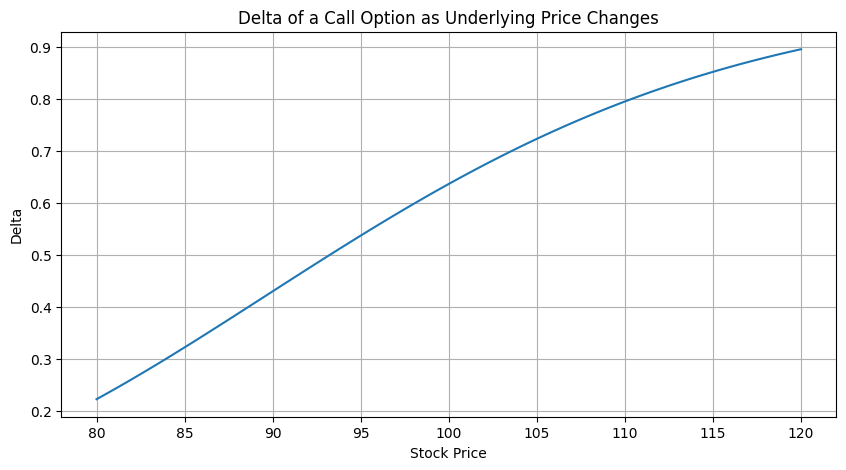

In [18]:
# Define a range of stock prices
stock_prices = np.linspace(80, 120, 100)
deltas = [BlackScholesGreeks(S=price, K=100, T=1, r=0.05, sigma=0.2).delta_call() for price in stock_prices]

# how these Greeks change with the underlying asset price
plt.figure(figsize=(10, 5))
plt.plot(stock_prices, deltas)
plt.title('Delta of a Call Option as Underlying Price Changes')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.grid(True)

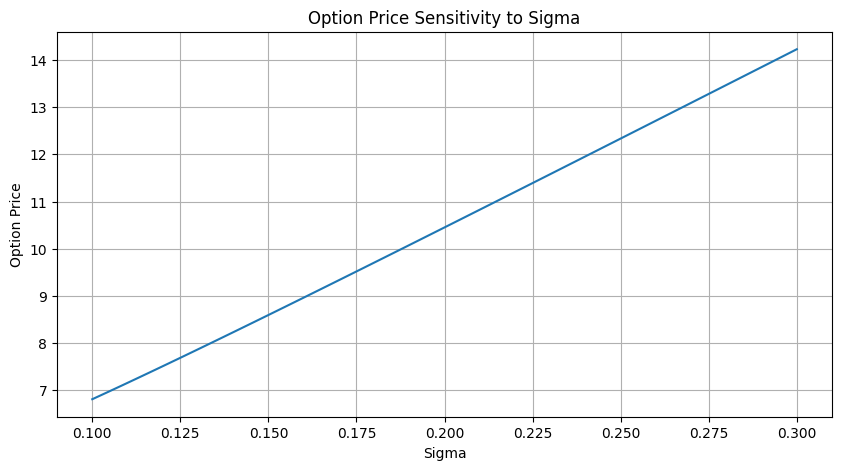

In [19]:
# plot the option price against different volatilities and interest rates
# Analyzing Sensitivity of Option Prices
#The Black-Scholes model assumes that volatility and interest rates are constant, which is not the case in the real world. Therefore, it’s important to analyze how sensitive option prices are to changes in these parameters.
def plot_option_sensitivity(bs_model, parameter, values, option_type='call'):
    prices = []
    for value in values:
        setattr(bs_model, parameter, value)
        if option_type == 'call':
            prices.append(bs_model.call_option_price())
        else:
            prices.append(bs_model.put_option_price())

    plt.figure(figsize=(10, 5))
    plt.plot(values, prices)
    plt.title(f'Option Price Sensitivity to {parameter.capitalize()}')
    plt.xlabel(parameter.capitalize())
    plt.ylabel('Option Price')
    plt.grid(True)

# Example usage:
volatilities = np.linspace(0.1, 0.3, 100)
plot_option_sensitivity(bsm, 'sigma', volatilities, 'call')

Volatility Surface
https://www.investopedia.com/articles/stock-analysis/081916/volatility-surface-explained.asp

The volatility surface refers to a three-dimensional plot of the implied volatilities of the various options listed on the same stock.

Implied volatility is used in options pricing to show the expected volatility of the option's underlying stock over the life of the option.

The volatility surface varies over time and is far from flat, demonstrating that the assumptions of the Black-Scholes model are not always correct.

The volatility surface is a three-dimensional plot where the x-axis is the time to maturity, the z-axis is the strike price, and the y-axis is the implied volatility. If the Black-Scholes model were completely correct, then the implied volatility surface across strike prices and time to maturity should be flat. In practice, this is not the case.

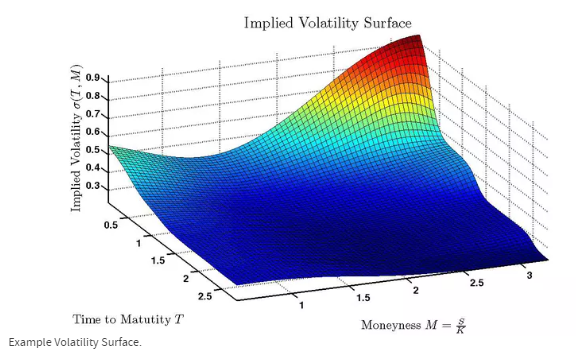

Using different distributions for movements in the same underlying asset is
dubious at best, the Black-Scholes model doesn't accurately reflect the dynamics we observe in traded option prices

We can see that a low strike put option has a higher implied volatility than a high strike call option. This has a natural risk premia explanation, due to the demand for low strike puts as hedging vehicles.

Bachelier Model

-Assume asset price is normally distributed, it's an alternative to Black-Scholes Model

image.png

(based on a single underlying parameter, σ)

-In contrast with the Black-Scholes model, volatility in the Bachelier model is not a function of the current asset price. This means that magnitude of the dW term is independent of the level of the underlying asset. Instead of being a
relative to an asset price it is now an absolute level of volatility that is often referred to as basis point volatility

-allow for the possibility of negative asset values. This is because the distribution of asset prices is normal, rather than log-normal. When asset prices are close to zero, the magnitude of the changes does not adapt, enabling it to pass zero with positive probability. In some markets, such as interest rates, this potential for negative rates might be a feature. The main applications of Bachelier's model tend to be in rates markets.

-Bachelier model will lead to some amount of skew in an implied volatility surface. The Bachelier model doesn't provide enough control of this Black-Scholes implied volatility skew to match many market settings.



CEV Model (Constant Elasticity of Variance model)

-a generalization of the log-normal and normal models (the Black-Scholes and Bachelier models) , contains an additional parameter, controlling the exponent of the volatility term of the SDE, In particular, β = 1 and β = 0 reduce back to the log-normal and normal models, respectively.

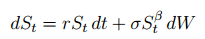

β, which is the exponent of the asset price used in the volatility term. The inclusion of β as a second parameter enables us to try to fit more of the
volatility surface. In practice, while this model is able to account for some degree of skew due to the added β parameter, we will find that it does not provide the flexibility to match market observed skews in most asset classes.


Implementation sample: https://www.thekerneltrip.com/stochastic-calculus/estimate-cev-process/

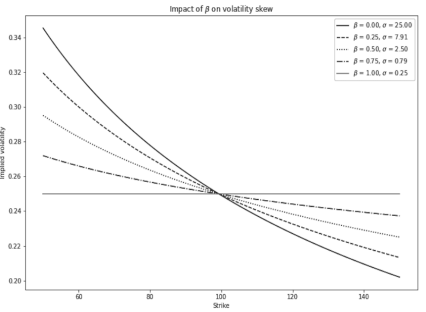

β = 0 --> Bachelier Model / β = 1 --> the Black-Scholes model. the CEV model has the most flexibility, enabling it to match skews with different slopes.Different levels of volatility, σ, were used to correspond to each level of β. This is because for each β the σ has a different expectation, and therefore a different required magnitude. At the extreme of this, we saw that in the Bachelier model, σ was interpreted as an absolute volatility. As such, it is by necessity higher than in the Black-Scholes model, where σ has a percentage interpretation. Therefore, in this chart we used the equivalent level of volatility for each specified β.

Ornstein-Uhlenbeck (OU) Process

A first order mean-reverting process where we assume deviations from some long run equilibrium revert at a specified speed, κ.

The mean-reverting nature of the process makes it attractive in markets where there is empirical evidence of mean-reversion in the underlying asset, such as volatility and interest rates. This feature is less desirable in markets like equities where mean-reversion in the underlying asset would violate no-arbitrage conditions or weak-form market efficiency.

image.png

• κ: speed of mean-reversion
• θ: long run equilibrium asset level
• σ: volatility parameter


Cox-Ingersol-Ross Model

Like an OU process, the Cox-Ingersol-Ross (CIR) model is a mean reverting process with a square root in the volatility term

image.png

Inclusion of this square root in the volatility term prevents the asset price from becoming negative, which is a desirable feature in many markets. More generally, we can see that this volatility term follows a CEV model with β = 0.5. Aside from this modification, the CIR model mimics the OU process we saw above in its parameters and mean-reverting nature.

The CIR model is most commonly applied in interest rate markets, where the
mean-reverting nature of the asset price is particularly appealing. Additionally, the CIR model is often to model volatility, as it is in the Heston model. The square root in the volatility term, however, prevents the underlying distribution from being Gaussian and makes solving the SDE significantly more challenging than in the case of an OU process.

-As a result, these models will be unable to match the behavior of many different volatility surfaces that we observe in practice, such as the persistent put skew we observe in equity markets, or the smile phenomenon that we sometimes observe in FX markets.

-These models do provide us with a natural means of comparing options across strikes and expiries. Additionally, these models are defined by an intuitive set of sensitivities, often referred to as Greeks.

-What these models will fail to do is provide a single, unified, consistent set of dynamics for the entire volatility surface. To accomplish this, we will need to rely on a more realistic and advanced model.